In [12]:
import numpy as np
import matplotlib.pyplot as plt

from element import Element
from node import Node

def plot(N_vec):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the deformed shape
    ax.plot(N_vec[:, 0], N_vec[:, 1], N_vec[:, 2], label='Deformed shape', linewidth=2)
    
    # Add labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()

class LinearShapeFunctions:
    def __init__(self, elem: Element, discretization_points: int = 100):
        L = elem.L
        self.X_node_1 = elem.node_list[0].coords
        self.X_node_2 = elem.node_list[1].coords
        self.x = np.linspace(self.X_node_1, self.X_node_2, discretization_points)
        self.N1 = 1 - self.x/L
        self.N2 = self.x/L

    def N_vector(self):
        return self.N1 * self.X_node_1 + self.N2 * self.X_node_2

class HermiteShapeFunctions:
    
    def apply(self, displacement_vector: np.ndarray, elem: Element, discretization_points: int = 100):
        X_node_1 = elem.node_list[0].coords
        X_node_1_deformed = X_node_1 + displacement_vector[:3]
        X_node_2 = elem.node_list[1].coords
        X_node_2_deformed = X_node_2 + displacement_vector[6:9]
        theta_node_1 = displacement_vector[3:6]
        theta_node_2 = displacement_vector[9:12]
        # x_old = np.linspace(X_node_1, X_node_2, discretization_points)
        # x_new = np.linspace(X_node_1_deformed, X_node_2_deformed, discretization_points)
        x_new = np.linspace(0, X_node_2_deformed - X_node_1_deformed, discretization_points)
        # L_old = np.array(X_node_2 - X_node_1)
        L_new = np.array(X_node_2_deformed - X_node_1_deformed)
        N1 = 1 - 3*(x_new/L_new)**2 + 2*(x_new/L_new)**3
        N2 = 3*(x_new/L_new)**2 - 2*(x_new/L_new)**3
        N3 = x_new*(1 - x_new/L_new)**2
        N4 = x_new * ((x_new/L_new)**2 - x_new/L_new)
        deformed_shape = N1 * X_node_1_deformed + N2 * X_node_2_deformed + N3 * theta_node_1 + N4 * theta_node_2
        return deformed_shape

In [19]:
elem = Element(node_list=[Node(coords = np.array([0, 0, 0])), Node(coords = np.array([1, 1, 1]))], A = 1, E = 1, Iy = 1, Iz = 1, J = 1, I_rho = 1, nu = 0.3)
elem2 = Element(node_list=[Node(coords = np.array([1, 1, 1])), Node(coords = np.array([2, 1, 1]))], A = 1, E = 1, Iy = 1, Iz = 1, J = 1, I_rho = 1, nu = 0.3)
displacement_vector = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
hermite_sf = HermiteShapeFunctions()
deformed_shape = []
for elem_ in [elem, elem2]:
    deformed_shape.append(hermite_sf.apply(displacement_vector, elem_))

# fig = plt.figure()
# x_lin = np.linspace(0, 1, 100)
# y_lin = np.linspace(0, 1, 100)
# ax = fig.add_subplot(111, projection='3d')
# # ax.scatter(x_lin, y_lin, deformed_shape[:, 2])
# ax.plot(x_lin, y_lin, deformed_shape[:, 2])

/var/folders/m4/xgl7zn991jqftrg9sn21fxfc0000gn/T/ipykernel_84641/2777799940.py:46: RuntimeWarning: divide by zero encountered in divide
  N1 = 1 - 3*(x_new/L_new)**2 + 2*(x_new/L_new)**3
/var/folders/m4/xgl7zn991jqftrg9sn21fxfc0000gn/T/ipykernel_84641/2777799940.py:46: RuntimeWarning: invalid value encountered in add
  N1 = 1 - 3*(x_new/L_new)**2 + 2*(x_new/L_new)**3
/var/folders/m4/xgl7zn991jqftrg9sn21fxfc0000gn/T/ipykernel_84641/2777799940.py:47: RuntimeWarning: divide by zero encountered in divide
  N2 = 3*(x_new/L_new)**2 - 2*(x_new/L_new)**3
/var/folders/m4/xgl7zn991jqftrg9sn21fxfc0000gn/T/ipykernel_84641/2777799940.py:47: RuntimeWarning: invalid value encountered in subtract
  N2 = 3*(x_new/L_new)**2 - 2*(x_new/L_new)**3
/var/folders/m4/xgl7zn991jqftrg9sn21fxfc0000gn/T/ipykernel_84641/2777799940.py:48: RuntimeWarning: divide by zero encountered in divide
  N3 = x_new*(1 - x_new/L_new)**2
/var/folders/m4/xgl7zn991jqftrg9sn21fxfc0000gn/T/ipykernel_84641/2777799940.py:49: RuntimeWar

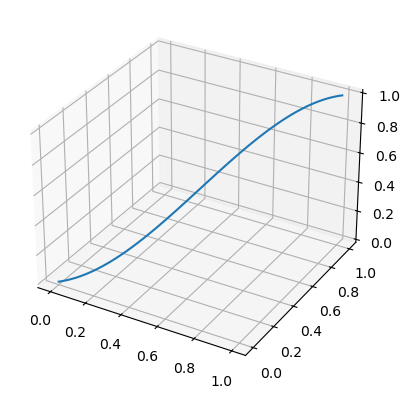

In [11]:
fig = plt.figure()
x_lin = np.linspace(0, 1, 100)
y_lin = np.linspace(0, 1, 100)
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x_lin, y_lin, deformed_shape[:, 2])
ax.plot(x_lin, y_lin, deformed_shape[:, 2])